In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import anderson
import scipy as scipy
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
from scipy.stats import shapiro

In [2]:
#data = np.genfromtxt('./data/18_pdf_19.csv', delimiter=',')
#data = np.genfromtxt('./data/data_test.csv', delimiter=',')
#data_all = pd.read_csv("./data/18_pdf_18_all.csv")
#data_all = pd.read_csv("./data/test_3.csv")
data_handle = pd.read_csv('./data/data_test.csv')
print (data_handle)

             X        Y  PCI  RSRP
0      78.0475  11.6995   41 -82.3
1      78.0475  11.6995   41 -82.2
2      78.0475  11.6995   41 -82.0
3      78.0475  11.6995   41 -82.1
4      78.0475  11.6995   41 -80.9
5      78.0475  11.6995   41 -82.1
6      78.0475  11.6995   41 -83.2
7      78.0475  11.6995   41 -82.1
8      78.0475  11.6995   41 -80.5
9      78.0475  11.6995   41 -82.6
10     78.0475  11.6995   41 -81.2
11     78.0475  11.6995   41 -80.8
12     78.0475  11.6995   41 -81.5
13     78.0475  11.6995   41 -79.8
14     78.0475  11.6995   41 -80.8
15     78.0475  11.6995   41 -80.7
16     78.0475  11.6995   41 -80.5
17     78.0475  11.6995   41 -81.0
18     78.0475  11.6995   41 -81.1
19     78.0475  11.6995   41 -80.4
20     78.0475  11.6995   41 -80.1
21     78.0475  11.6995   41 -81.5
22     78.0475  11.6995   41 -80.7
23     78.0475  11.6995   41 -80.0
24     78.0475  11.6995   41 -81.4
25     78.0475  11.6995   41 -80.8
26     78.0475  11.6995   41 -80.9
27     78.0475  11.6

In [ ]:
def number_drift(data):
    
    x = np.arange(0,10,1)
    sigma = 1
    def norm_pdf(x,mu,sigma):
        pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))    
        return pdf

    mu = 0    
    plt.hist(data, bins=100, alpha=0.7)
    y = norm_pdf(x, mu, sigma)
    #plt.plot(x,y, color='orange', lw=3)
    plt.show()
    
    sns.distplot(data)

/home/reed/anaconda3/envs/reed_env/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/reed/anaconda3/envs/reed_env/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

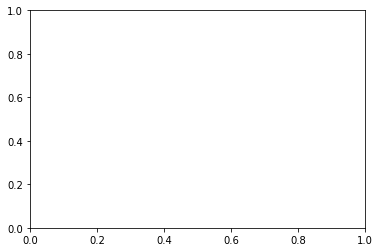

In [19]:
number_drift(data)

In [ ]:
def group(data_all):
    X_group_mean = data_all.groupby('PCI').mean()
    X_group_std = data_all.groupby('PCI').std()
    X_group_median = data_all.groupby('PCI').median()
    #X_group_mean = data_all.mean()
    #X_group_std = data_all.std()
    #X_group_median = data_all.median()
    print (X_group_mean)
    print (X_group_std)
    print (X_group_median)
    return X_group_mean,X_group_std

In [ ]:
#X_group_mean,X_group_std = group(data_all)
#group(data_all)

In [ ]:
#x = np.linspace(-15, 15, 9)
x = np.array([1,1,1,1,1,100,100,50,23,19])
#np.savetxt('x.csv', x, delimiter=',', fmt='%f')
#anderson(data, dist ='norm' )
scipy.stats.scoreatpercentile(data, 95)


In [ ]:
print (scipy.stats.normaltest (data, axis=0))
k2,p = scipy.stats.normaltest (data, axis=0)
alpha = 0.05
if p < alpha:
    print("Sample does not look Gaussian (reject H0),NOT")
else:
    print("Sample looks Gaussian (fail to reject H0),YES Gaussian!!")

In [ ]:
scipy.stats.shapiro(data)

In [ ]:
##### Anderson-Darling Test #####
# seed the random number generator
seed(1)
# normality test
#data = 5 * randn(100) + 50
result = anderson(data)

print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:
##### D’Agostino’s K^2 Test #####
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [ ]:
##### Shapiro-Wilk Test #####
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [3]:
def group_drift(data_handle):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_mean = data_handle.groupby(['X','Y','PCI']).mean()
    group_drift = data_handle.groupby(['X','Y','PCI']).transform(lambda x: x - x.mean())
    return group_mean,group_drift

In [4]:
group_mean,group_drift = group_drift(data_handle)
print (group_mean)
group_mean.to_csv('group_mean.csv')

                            RSRP
X        Y       PCI            
6.9745   14.5660 37  -111.464000
                 39  -111.636842
7.0255   16.5805 37  -121.456000
                 39  -124.574074
7.0330   12.1930 37  -115.118750
                 39  -118.212500
8.7550   14.6395 37  -115.050000
                 39  -119.633333
8.8030   16.5355 37  -125.670370
                 39  -125.677778
8.9290   12.1450 37  -119.542857
                 39  -117.366667
9.5515   13.3150 37  -102.018182
                 39  -102.246667
11.2135  13.3915 37   -98.595882
                 39  -113.700000
12.8665  13.1125 37   -97.625455
                 39  -102.020000
14.5285  13.1890 37   -97.439394
16.4215  13.0225 37   -94.520952
18.3205  13.0930 37   -94.156693
19.8580  12.9355 37   -86.687000
21.7570  13.0060 37   -81.422344
23.6560  13.0765 37   -79.892424
25.5490  12.9100 37   -85.310037
26.9710  12.8740 37   -91.176995
28.7515  12.9475 37   -96.844369
30.7600  12.6595 37   -96.848020
          

In [5]:
print (group_drift)

           RSRP
0     -1.460656
1     -1.360656
2     -1.160656
3     -1.260656
4     -0.060656
5     -1.260656
6     -2.360656
7     -1.260656
8      0.339344
9     -1.760656
10    -0.360656
11     0.039344
12    -0.660656
13     1.039344
14     0.039344
15     0.139344
16     0.339344
17    -0.160656
18    -0.260656
19     0.439344
20     0.739344
21    -0.660656
22     0.139344
23     0.839344
24    -0.560656
25     0.039344
26    -0.060656
27    -0.260656
28    -0.560656
29    -0.460656
...         ...
50294 -0.399010
50295 -0.499010
50296 -0.599010
50297 -0.499010
50298 -0.099010
50299 -0.199010
50300 -0.199010
50301  0.000990
50302 -0.199010
50303 -0.199010
50304 -0.099010
50305 -0.199010
50306  0.000990
50307  0.200990
50308  0.100990
50309  0.200990
50310  0.200990
50311  0.100990
50312  0.000990
50313  0.100990
50314  0.400990
50315  0.300990
50316  0.300990
50317 -0.199010
50318  0.200990
50319  0.800990
50320 -0.499010
50321 -0.399010
50322 -1.999010
50323 -3.299010

[50324 

In [6]:
print(group_drift[11841:11884])  
group_drift.to_csv('group_drift.csv')

           RSRP
11841  2.136842
11842 -0.536000
11843 -3.563158
11844 -1.863158
11845 -1.336000
11846  4.236842
11847  2.464000
11848  0.736842
11849  1.664000
11850 -2.963158
11851 -2.463158
11852  1.664000
11853 -4.963158
11854  0.664000
11855 -4.163158
11856 -0.936000
11857 -0.836000
11858  0.764000
11859 -0.936000
11860 -0.236000
11861  3.336842
11862 -0.436000
11863  3.036842
11864  0.064000
11865  0.164000
11866  3.036842
11867  3.236842
11868  0.064000
11869  2.936842
11870  0.464000
11871  3.036842
11872  0.164000
11873 -0.836000
11874  0.164000
11875  2.736842
11876  2.164000
11877 -0.536000
11878 -0.936000
11879 -0.236000
11880 -0.236000
11881 -2.663158
11882 -3.363158
11883 -2.354639


In [7]:
#data = np.genfromtxt('./data/data_test.csv', delimiter=',')

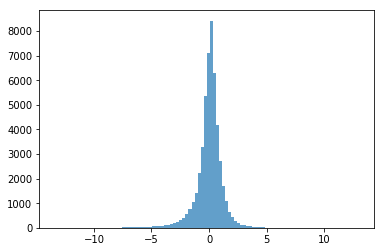

/home/reed/anaconda3/envs/reed_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


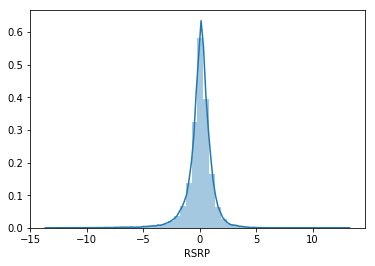

In [8]:
def number_drift(group_drift):
    
    x = np.arange(0,10,1)
    sigma = 1
    def norm_pdf(x,mu,sigma):
        pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))    
        return pdf

    mu = 0    
    plt.hist(group_drift, bins=100, alpha=0.7)
    y = norm_pdf(x, mu, sigma)
    #plt.plot(x,y, color='orange', lw=3)
    plt.show()
    
    sns.distplot(group_drift)
number_drift(group_drift['RSRP'])

In [9]:
##### Shapiro-Wilk Test #####
# normality test
stat, p = shapiro(group_drift['RSRP'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.852, p=0.000
Sample does not look Gaussian (reject H0)


/home/reed/anaconda3/envs/reed_env/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
